## Pandas 구성
- Series
    - 구조, 속성, 변환 및 접근, 생성, 특징, 메소드, 연산
- DataFrame
    - 구조, 생성 및 컬럼 할당, 컬럼 삭제, 인덱스, 열 접근, 행 접근
- MutliIndex
    - 생성, 내부 구조, 적용
- DataFrame(MultiIndex)
    - 전치, 열 접근, 행 접근, 데이터 변경, groupby, 병합
- pandas 모듈 임포트
    - import pandas as pd 

## Sereis
- 1차원의 데이터를 관리하는 구조
- 기본 구조
    - pd.Series(data,index,dtypes,name)
    - data : 실제 데이터 값 - numpy, list의 collect type 데이터 
    - index : 데이터를 접근할 정보 - numpy, list의 collect type 데이터
    - dictionary 타입을 Series로 사용할 경우 key는 index로 value는 data로 변환
    - dtypes : 데이터들의 타입
    - name : Sereies 인스턴스의 이름
- Series의 구조 속성
    - name : 인스턴스 이름
    - shape : DataFrame의 행렬구조 Sereis에서는 (1,)형태로 표현
    - dtypes : 데이터 타입을 표현
    - ndim : 차원에 대한 정보를 표시
    - size : 원소들의 개수
    - index : 생성된 행에 대한 index 표시
    - values : 실제 데이터를 numpy 로 변환 

#### Series는 numpy ndarray 데이터를 사용하여 index, value의 속성으로 구성됨 <sup>***</sup>

In [19]:
## 1,2,3,4,5의 원소로 구성된 Series데이터 생성하고 Series데이터 구조 확인
import pandas as pd # pandas 모듈 임포트 일반적으로 pandas 모듈의 별칭은 pd로 한다
import numpy as np
data = [1,2,3,4,5]
obj = pd.Series(data)
print(obj)
print(obj.values)
print(obj.index)
print(obj.dtypes)
print(obj.name)
# one, two, three, four, five로 구성된 index를 명시적으로부여
obj = pd.Series(data,index=['one','two','three','four','five'])
print(obj)
print(obj.values)
print(obj.index)
print(obj.dtypes)
print(obj.name)
# dictionary 사용하여 Series 생성
dic = {'one':1,'two':2,'three':3,'four':4,'five':5}
obj = pd.Series(dic)
print(obj.values)
print(obj.index)

0    1
1    2
2    3
3    4
4    5
dtype: int64
[1 2 3 4 5]
RangeIndex(start=0, stop=5, step=1)
int64
None
one      1
two      2
three    3
four     4
five     5
dtype: int64
[1 2 3 4 5]
Index(['one', 'two', 'three', 'four', 'five'], dtype='object')
int64
None
[1 2 3 4 5]
Index(['one', 'two', 'three', 'four', 'five'], dtype='object')


In [20]:
## 위에서 생성한 obj를 사용하여 Series 객체 속성 확인
print(obj.shape)
print(obj.ndim)
print(obj.size)
print(obj.axes)
print(obj.name)
## obj에 이름 부여 
obj.name = 'obj_name'
print(obj.name)
## Series 구조를 이루는 value, index, name속성을 사용하여 Series 객체 만들기
data = np.array([1,2,3,4,5])
obj = pd.Series(data)
obj.index = ['one','two','three','four','five']
obj.name = 'object_name'
print(obj.values)
print(obj.index)
print(obj.name)

(5,)
1
5
[Index(['one', 'two', 'three', 'four', 'five'], dtype='object')]
None
obj_name
[1 2 3 4 5]
Index(['one', 'two', 'three', 'four', 'five'], dtype='object')
object_name


## Series 객체의 접근 (DataFrame은 행과 열로 적용)
- get : index 값이나 index 순번을 통해 접근
- at : 인덱스 값을 통해 1개의 값에 접근
- iat : 정수 위치를 통해 1개의 값에 접근
- loc : 인덱스 값을 통해 여러개의 값에 접근
- iloc : 정수 위치
- iteritems or items: 인덱스와 값을 튜플로 반환 접근

In [21]:
obj.get(0)
obj.get('one')
obj.get([0,3])
obj.get(['one','three'])
obj.at['one']
obj.iat[0]
obj.loc[['one','four']]
obj.iloc[[2,3,4]]
print(list(obj.iteritems()))
print(list(obj.iteritems()) == list(obj.items()))
print(obj.iteritems() == obj.items())

[('one', 1), ('two', 2), ('three', 3), ('four', 4), ('five', 5)]
True
False


## Series 객체의 변환
- astype : Series 객체의 데이터 타입 변경
- infer_objects : 적절한 데이터 타입 추천
- tolist : Series 객체를 list 형태로 변환
- to_dict : Series 객체를 dictionary 형태로 변환 Series의 Index는 key로 values는 value로 변환
- to_json : Series 객체를 json형태로 변환

In [22]:
obj = obj.astype('object')
print(obj)
print(obj.infer_objects())
print(obj.to_dict())
print(obj.tolist())
obj.to_json()

one      1
two      2
three    3
four     4
five     5
Name: object_name, dtype: object
one      1
two      2
three    3
four     4
five     5
Name: object_name, dtype: int64
{'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}
[1, 2, 3, 4, 5]


'{"one":1,"two":2,"three":3,"four":4,"five":5}'

## Series 특징 (ndarray - like)
- ndarray와 매우 유사하게 동작
- index로 슬라이스 접근 가능

## dict - like
- Series는 인덱스를 사용하여 값을 가져오거나 변경/설정할 수 있다는 점에서 dict와 유사
- 객체[key] = value로 해당 key에 대한 값을 변경/설정
- Series의 슬라이스는 순서를 나타내는 것이므로 index가 문자 가능

In [23]:
dic = {'one':1,'two':2,'three':3,'four':4,'five':5}
obj = pd.Series(dic,name='dic')
obj[0]
obj[:3]
obj[obj>3]
obj[::-1]
obj[[1,2,3]]
obj['three']
obj['three'] = 33
print(obj)
print(obj['three':'five'])

one       1
two       2
three    33
four      4
five      5
Name: dic, dtype: int64
three    33
four      4
five      5
Name: dic, dtype: int64


## Series 주요 메소드
- 변경 메소스 replace
    - series 내의 값을 변경
    - 인자로 지정한 값과 동일한 값 전체를 변경
    - replace 함수 사용시 변경 후 자동 저장되지 않음 (inplace 옵션 설정 필요)
    - 특정 위치의 값 만을 변경하기 위해서는 특정된 범위 지정 후 변경가능

- 정렬 메소드
    - sort_values : value값을 기준으로 정렬
    - 주요인자
        - ascending : bool, default = True
        - inplace : bool, default = False
    - sort_index : index 값을 기준으로 정렬
        - ascending : bool, default = True
        - inplace : bool, default = True
        

In [24]:
## replace 메소드 사용
obj.replace(33,3,inplace=True)
print(obj)
obj.replace(3,33)
print(obj)
obj['three':'five'].replace(3,33,inplace=True)
print(obj)
## 정렬 메소드 사용
obj.sort_values()
print(obj.sort_index())

one      1
two      2
three    3
four     4
five     5
Name: dic, dtype: int64
one      1
two      2
three    3
four     4
five     5
Name: dic, dtype: int64
one       1
two       2
three    33
four      4
five      5
Name: dic, dtype: int64
five      5
four      4
one       1
three    33
two       2
Name: dic, dtype: int64


## Series 산술연산<sup>**</sup>
- Series 간 산술 연산 시 동일 위치 원소 간 계산
- index 매칭되지 않을 시 NaN 처리
## Series 여러 메소드
- 연결 메소스 append 
    - verify_integrity : index가 중복될 시 에러 발생 default False (참고만)
- 집계 메소드 
    - count : Null이 아닌 개수 확인
    - mode : value 중 가장 많은 값 (Series 형태 - key,value 쌍으로 반환)
    - mean, std, var, describe : 각각 평균, 표준편차, 분산 및 한꺼번에 구하기(형태 반환이 중요)
    - unique : 중복되지 않은 단일 값(numpy array로 출력)
    - describe 사용 sentence 
        - count : 전체 원소 수
        - unique : 단일 문자 수
        - freq : 가장 많은 문자 중복 수
        - top : 가장 많은 단어

In [39]:
## 산술 연산 
print(obj + obj)
obj1 = pd.Series([1,2,3,4],index = ['one','three','two','five'])
print(obj+obj1)
## 연결 메소드 append
obj2 = obj.append(obj1)
obj3 = obj.append(obj1,)
print(obj2)
print(obj3.describe())
string = 'Good Mornig Welcome to Pyhon Traing'
sentence = list(string)
sentence = pd.Series(sentence)
print(sentence)
sentence.describe()

one       2
two       4
three    66
four      8
five     10
Name: dic, dtype: int64
five      9.0
four      NaN
one       2.0
three    35.0
two       5.0
dtype: float64
one       1
two       2
three    33
four      4
five      5
one       1
three     2
two       3
five      4
dtype: int64
count     9.000000
mean      6.111111
std      10.178954
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max      33.000000
dtype: float64
0     G
1     o
2     o
3     d
4      
5     M
6     o
7     r
8     n
9     i
10    g
11     
12    W
13    e
14    l
15    c
16    o
17    m
18    e
19     
20    t
21    o
22     
23    P
24    y
25    h
26    o
27    n
28     
29    T
30    r
31    a
32    i
33    n
34    g
dtype: object


count     35
unique    20
top        o
freq       6
dtype: object

## DataFrame 구조
- n by m 행렬 구조를 가지며, index와 column이 별도의 이름을 갖고, column별로 다른 데이터 타입을 가질 수 있음
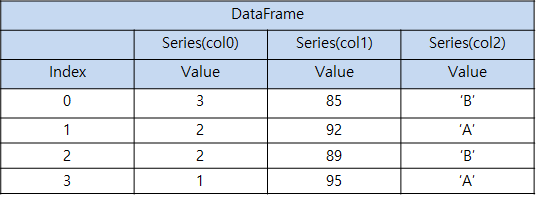

- DataFrame은 기본적으로 column 단위로 데이터를 관리
- 각 Column은 Series 이다
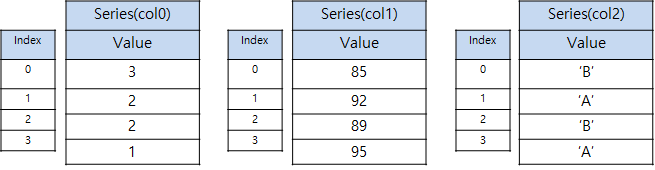
---
## DataFrame 생성 
- 일반적인 DataFrame은 외부 데이터를 pandas에서 읽어오면 DataFrame으로 변환된다
- column 추가
    - DataFrame 생성 후 column 추가
         - 객체명['컬럼명'] = 데이터
         - 추가 하려는 컬럼이 존재하지 않을 경우 추가 됨
---
## 컬럼속성
- column 변경
    - DataFrame.columns 속성
        - 컬럼명 속성을 통해 각 컬럼명 지정 가능
        - DataFrame의 rename 메소드 사용 
            - 1) DataFrame.rename(columns = {'대상컬럼명':'바꿀컬럼명'})
            - 2) DataFrame.rename({'대상컬럼명':'바꿀컬럼명'},axis='columns')
- column에 데이터 재할당
    - 컬럼이 존재할 때는 덮어쓰기
- column 삭제
    - drop 메소드 
        - 1) drop(컬럼명, axis=1) 
        - 2) drop(columns=['컬럼명'])
    - del 객체명['컬럼명']
- 신규 컬럼에 컬럼 간 연산 데이터 저장
    - 두개의 컬럼 연산 시 동일 행 간 연산
    - 컬럼은 Series 이기 때문에 Series연산과 동일

In [77]:
## Series를 사용하여 DataFrame 생성
col1 = pd.Series([1,2,3,4],index = ['one','two','three','four'])
col2 = pd.Series([5,6,7,8],index = ['five','six','seven','eight'])
col3 = pd.Series([9,10,11,12],index = ['one','two','three','four'])
df = pd.DataFrame(col1)
print(df)
df.columns = ['col1']
df['col2'] = col2
df['col3'] = col3
print(df)

df.rename({'col2':'col_2'}, axis='columns',inplace=True)
print(df)

## col1,과 col3를 합하여 col4 생성
df['col4'] = df.col1 + df.col3
print(df)
## col1,col3,col4를 col_1, col_3, col_4로 column 이름 변경


       0
one    1
two    2
three  3
four   4
       col1  col2  col3
one       1   NaN     9
two       2   NaN    10
three     3   NaN    11
four      4   NaN    12
       col1  col_2  col3
one       1    NaN     9
two       2    NaN    10
three     3    NaN    11
four      4    NaN    12
       col1  col_2  col3  col4
one       1    NaN     9    10
two       2    NaN    10    12
three     3    NaN    11    14
four      4    NaN    12    16


## 인덱스 속성
- index 조회/설정/변경 가능
    - DataFrame.index
    - DataFrame의 rename 메소드 사용 
        - 1) DataFrame.rename(index = {'대상인덱스명':'바꿀인덱스명'})
        - 2) DataFrame.rename({'대상인덱스명':'바꿀인덱스명'},axis='index')
- 행의 수와 index수는 일치해야 함

In [87]:
## Series를 사용하여 DataFrame 생성
col1 = pd.Series([1,2,3,4],index = ['one','two','three','four'])
col2 = pd.Series([5,6,7,8],index = ['five','six','seven','eight'])
col3 = pd.Series([9,10,11,12],index = ['one','two','three','four'])
df = pd.DataFrame(col1)
df.columns = ['col1']
df['col2'] = col2
df['col3'] = col3
print(df)
## df의 col2 삭제
df.drop('col2',axis=1,inplace=True)
print(df)
col2.index = col1.index
df['col2'] = col2
print(df)

       col1  col2  col3
one       1   NaN     9
two       2   NaN    10
three     3   NaN    11
four      4   NaN    12
       col1  col3
one       1     9
two       2    10
three     3    11
four      4    12
       col1  col3  col2
one       1     9     5
two       2    10     6
three     3    11     7
four      4    12     8


## DataFrame 열 접근
- 단일 열 검색 : 인덱스 방식 []사용
    - 객체명['컬럼명']
- 멀티 열 검색 : 리스트 방식[[,]]
    - 객체명[['컬럼명1','컬럼명2']]
    - 검색하려는 열을 리스트 형태로 전달
    - 컬럼명을 지정하여 전달하는 것이므로 슬라이스 방식 불가
    
## DataFrame 행 접근
- 객체명[인덱스 슬라이스]
- 객체명[boolean]
- 상기 두가지 외에는 []를 사용하여 행 접근 하는 것은 불가 <sup>***</sup>

In [97]:
## DataFrame의 열 접근
df['col1']
df[['col1','col2']]
## DataFrame의 행 접근
df[0:2]
df[df.col1>1]
df[[False,True,True,False]]  

,col1,col3,col2
two,2,10,6
three,3,11,7


## DataFrame의 행렬 접근 <sup>*****</sup>
- loc 속성
    - 라벨 인덱스 기반 검색
- iloc 속성 <sup>****</sup> 주의요함
    - 숫자 인덱스 기반 검색
- at 속성
    - 라벨 기준 특정 한 개의 원소 검색
    - at[행,열]
- iat 속성
    - 숫자 인덱스 기준 특정 한 개의 원소 검색
    - iat[행,열]

In [131]:
df.loc[['one','two'],['col1','col2']]
df.loc[df.col1>2,['col2','col1']]

df.iloc[0:2,0:2]
df.iloc[[0,1],[True,False,True]]
df.at['one','col1']
df.iat[0,1]
## df 의 컬럼중 col1의 값이 2보다 큰 값을 찾는 것을 iloc을 사용하여 접근하면


9

## iterable한 객체를 사용한 DataFrame 생성 : list
- column 단위의 리스트를 zip을 이용하여 순서쌍을 만들어 DataFrame의 data로 생성
- DataFrame 생성 시 columns, index를 지정가능
- DataFrame 생성 후 columns, index 속성을 통해 지정 가능

## iterable한 객체를 사용한 DataFrame 생성 : dict
- column 단위의 리스트(Sequence)로 dict에 대입하여 데이터프레임 생성
- dict의 key값이 column명이 됨
- DataFrame 생성 시 index 지정 가능

In [140]:
## list 와 zip사용 DataFrame 생성
time = [3,2,2,1]
score = [85,92,89,95]
data  = zip(time,score)
df = pd.DataFrame(data,columns=["time","score"])
df['grad'] = np.where(df.score >= 90,'A','B')
## dict 사용 DataFrame 생성
grade = np.where(df.score >= 90,'A','B')
data = {'time':time,'score':score,'grade':grade}
df = pd.DataFrame(data)
df

,time,score,grade
0,3,85,B
1,2,92,A
2,2,89,B
3,1,95,A


## DataFrame groupby : 기준 column index화
- groupby의 목적 : 기준 값을 통한 aggregation data(평균, 카운트 등) 자료 획득<sup>****</sup>
- groupby 한 기준 값이 반환 값의 index
- as_idex=False(defaul는 True) 설정 시 groupby 기준 컬럼은 index가 아닌 column으로 됨

In [164]:
## DataFrame 생성
weight = np.random.randint(10,100,100)
height = np.random.randint(10,30,100)
kind = np.random.randint(0,2,100)
kind = np.where(kind == 0,'dog','cat')
data = zip(kind,weight,height)
df = pd.DataFrame(data)
df.columns = ['kind','weight','height']
## Groupby 적용
df.groupby('kind').mean()
df.groupby('kind').agg(['mean','sum','count'])
df.groupby('kind').agg(['mean','sum','count']).weight['mean']

kind
cat    57.680851
dog    54.037736
Name: mean, dtype: float64

## DataFrame 병합 : concat 함수
- numpy의 concatenate와 유사
- 기본적으로 DataFrame의 행으로 병합
- 파라메터 axis를 1로 할당시 열로 병합
- 기본 outer 병합 (index를 key로)
- join 파라메터를 사용하여 inner join가능

## DataFrame 병합 : join 방식
- left(left outer join) : 왼쪽 DataFrame 기준으로 데이터 병합
- right(right outer join) : 오른쪽 DataFrame 기준으로 데이터 병합
- outer(full outer join) : 양쪽 DataFrame 기준으로 데이터 병합
- inner(inner join) : 양쪽 DataFrame의 key가 존재하는 것만 병합

In [171]:
df_list = []
for i in range(3):
    col1 = np.random.randint(0,100,20)
    col2 = np.random.randint(0,100,20)
    col3 = np.random.randint(0,100,20)
    data = zip(col1,col2,col3)
    tmp = pd.DataFrame(data,columns=['col1','col2','col3'])
    df_list.append(tmp)
print(df_list)

df = pd.concat(df_list)
df_col = pd.concat(df_list,axis=1)

[    col1  col2  col3
0     68    27     2
1     58    29    75
2     84     0     6
3     97    13    54
4     67    90    99
5     82    82    88
6     24    52    34
7     85    77    12
8     40    65    12
9     61     6    71
10    50     8    83
11    69    24    51
12    20    12    51
13    58    51    94
14    99    60    32
15     0    92     7
16    39    63    84
17    86    34     0
18    74    90    71
19    72     5    94,     col1  col2  col3
0     32    65    23
1      4    39    88
2     47    21    92
3     43    42    38
4     41    64    68
5     79    16    18
6     50    54    11
7     49    14    70
8     24    65     9
9     98    96    65
10    27    20    83
11    81    89    37
12    71    67    62
13    20    49    97
14    41    83    19
15    96    47     4
16    34    11    95
17    29    11    90
18    41     7    41
19    11    63    54,     col1  col2  col3
0     41    97    11
1     86    74    41
2     12    28    48
3     27    73    87
4     78  

## DataFrame 병합 : merge 함수
- merge함수
    - 기본적으로 inner 방식으로 병합
    - on 인수 : 병합하기 위한 기준이 되는 key지정(key를 멀티로 지정 가능)

In [187]:
# 병합 하기 위한 두개의 DataFrame 생성
## 첫번째 DataFrame 생성
weight = np.random.randint(10,100,100)
height = np.random.randint(10,30,100)
kind = np.random.randint(0,2,100)
kind = np.where(kind == 0,'dog','cat')
data = zip(kind,weight,height)
left = pd.DataFrame(data)
left.columns = ['kind','weight','height']
## 두번째 DataFrame 생성
weight = np.random.randint(10,100,100)
height = np.random.randint(10,30,100)
kind = np.random.randint(0,2,100)
kind = np.where(kind == 0,'dog','cat')
data = zip(kind,weight,height)
right = pd.DataFrame(data)
right.columns = ['kind','weight','height']
df1 = pd.merge(left,right, on=['kind','weight'],how='outer')
df2 = pd.merge(left,right, on=['kind','weight'],how='inner')

## DataFrame 병합 : append 메소드
- 기본적으로 outer 방식으로 병합
- ignore_index인자 default False
- ignore_index가 True일 경우 index 번호 재배열

In [196]:
left.append(right,ignore_index=True)

,kind,weight,height
0,cat,35,25
1,cat,38,23
2,cat,88,23
3,cat,98,21
4,dog,84,14
...,...,...,...
195,cat,83,10
196,cat,75,28
197,dog,29,11
198,dog,25,26


## DataFrame 병합 : join 메소드
- 기본적으로 index를 기준으로 병합
- 기본 how='left'
- how='outer' : 기준 DataFrame과 병합대상 DataFrame 양쪽 모두 존재하는 key값을 대상으로 병합
- on 인자 index 대신 기준이 되는 key값 지정

## DataFrame IO : to_*/read_*
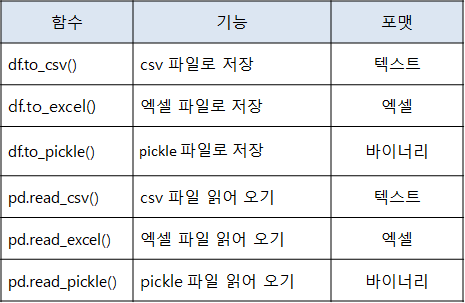

In [202]:
df.to_csv('df.csv') ## 저장할 때
df = pd.read_csv('df.csv') ## 읽어 올 때